In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore", category=FutureWarning)

### Importing the Dataset

In [2]:
df = pd.read_csv('Dataset.csv')

### Inspecting the Dataset

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Product ID,10000,10000,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,NaN,NaN,NaN,107.951,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,NaN,NaN,NaN,0.0339,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,NaN,NaN,NaN,0.0046,0.067671,0.0,0.0,0.0,0.0,1.0


### Data Preprocessing

Ensuring that no missing values are present in the dataset

In [6]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


Ensuring that no missing values are concealed as question marks.

In [7]:
df.replace("?", np.nan, inplace=True)

To facilitate subsequent processing, converting all columns into float data type.

In [8]:
for column in df.columns:
    try:
        df[column] = df[column].astype(float)
    except ValueError:
        pass

Simply verify the descriptions of numeric features for absence of missing values and apparent outliers.

In [9]:
# Selecting numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Generating summary statistics
summary_statistics = numeric_df.describe(include='all').T

# Displaying the summary statistics table
summary_statistics

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


We are removing the features `UDI` and `Product ID` as they do not add value to the classification models being built.

In [10]:
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

We can notice from the dataset that the machine failure modes are represented through the features - `TWF`, `HDF`, `PWF`, `OSF`, and `RNF`. Therefore, we must combine the failure modes into a single feature for multiclass classification and subsequently eliminate the individual failure modes.

In [11]:
df['Machine failure'] = 0

# Assigning failure codes based on different factors
df.loc[df['TWF'] == 1, 'Machine failure'] = 1
df.loc[df['HDF'] == 1, 'Machine failure'] = 2
df.loc[df['PWF'] == 1, 'Machine failure'] = 3
df.loc[df['OSF'] == 1, 'Machine failure'] = 4
df.loc[df['RNF'] == 1, 'Machine failure'] = 5

# Dropping derived features
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

Performing one-hot encoding on categorical variables, dropping the first category

In [12]:
df = pd.get_dummies(df,drop_first=True)
df = df.astype(int)

Substituting missing numeric values with the mean

In [13]:
# Filling missing values in columns with mean
df.fillna(df.mean(), inplace=True)

# Filling missing values in all columns
for column in df.columns:
    try:
        df[column].fillna(df[column].mean(), inplace=True)
    except AttributeError:
        try:
            df[column].fillna(df[column].mode()[0], inplace=True)
        except:
            pass

In [14]:
# Displaying the updated DataFrame
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_L,Type_M
0,298,308,1551,42,0,0,0,1
1,298,308,1408,46,3,0,1,0
2,298,308,1498,49,5,0,1,0
3,298,308,1433,39,7,0,1,0
4,298,308,1408,40,9,0,1,0


### Feature Engineering

These calculations create new features based on existing columns in the DataFrame, which can potentially provide additional insights for analysis or modeling purposes.

1. `Power` = `Rotational speed [rpm]` * `Torque [Nm]`: Calculates the power by multiplying the rotational speed (in revolutions per minute) with the torque (in Newton meters).

2. `Power wear` = `Power` * `Tool wear [min]`: Calculates the power wear by multiplying the power with the tool wear (in minutes).

3. `Temperature difference` = `Process temperature [K]` - `Air temperature [K]`: Computes the temperature difference by subtracting the air temperature (in Kelvin) from the process temperature (in Kelvin).

4. `Temperature power` = `Temperature difference` / `Power`: Calculates the temperature power by dividing the temperature difference by the power.

In [15]:
# Calculating new features based on the existing columns
df['Power'] = df['Rotational speed [rpm]'] * df['Torque [Nm]']
df['Power wear'] = df['Power'] * df['Tool wear [min]']
df['Temperature difference'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['Temperature power'] = df['Temperature difference'] / df['Power']

In [16]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,2.995522e+02,2.014071e+00,295.000000,2.980000e+02,3.000000e+02,3.010000e+02,3.040000e+02
Process temperature [K],10000.0,3.095520e+02,1.511597e+00,305.000000,3.080000e+02,3.100000e+02,3.110000e+02,3.130000e+02
Rotational speed [rpm],10000.0,1.538776e+03,1.792841e+02,1168.000000,1.423000e+03,1.503000e+03,1.612000e+03,2.886000e+03
Torque [Nm],10000.0,3.953340e+01,9.975662e+00,3.000000,3.300000e+01,4.000000e+01,4.600000e+01,7.600000e+01
Tool wear [min],10000.0,1.079510e+02,6.365415e+01,0.000000,5.300000e+01,1.080000e+02,1.620000e+02,2.530000e+02
Machine failure,10000.0,9.900000e-02,5.619881e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
Type_L,10000.0,6.000000e-01,4.899224e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Type_M,10000.0,2.997000e-01,4.581494e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Power,10000.0,5.926834e+04,1.027410e+04,8658.000000,5.240400e+04,5.920000e+04,6.619250e+04,9.945000e+04
Power wear,10000.0,6.396723e+06,3.978889e+06,0.000000,3.056418e+06,6.197430e+06,9.399364e+06,2.067156e+07


### Data Visualizations

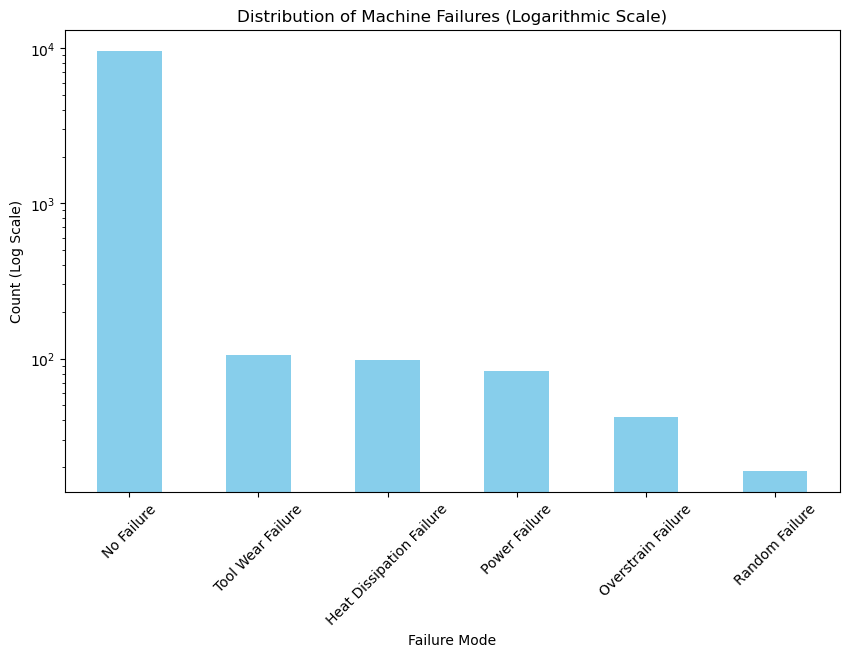

In [17]:
# Counting the occurrences of each machine failure mode
failure_counts = df['Machine failure'].value_counts()

# Define labels for each failure type
failure_labels = {
    0: 'No Failure',
    1: 'Tool Wear Failure',
    2: 'Heat Dissipation Failure',
    3: 'Power Failure',
    4: 'Overstrain Failure',
    5: 'Random Failure'
}

# Plotting the distribution of machine failures on a logarithmic scale
plt.figure(figsize=(10, 6))
failure_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Machine Failures (Logarithmic Scale)')
plt.xlabel('Failure Mode')
plt.ylabel('Count (Log Scale)')
plt.xticks(range(len(failure_labels)), [failure_labels[i] for i in range(len(failure_labels))], rotation=45)  # Setting custom tick labels
plt.yscale('log')  # Setting y-axis scale to logarithmic
plt.show()

### Pair Plot of Features with Respect to Machine Failure

<Figure size 10000x10000 with 0 Axes>

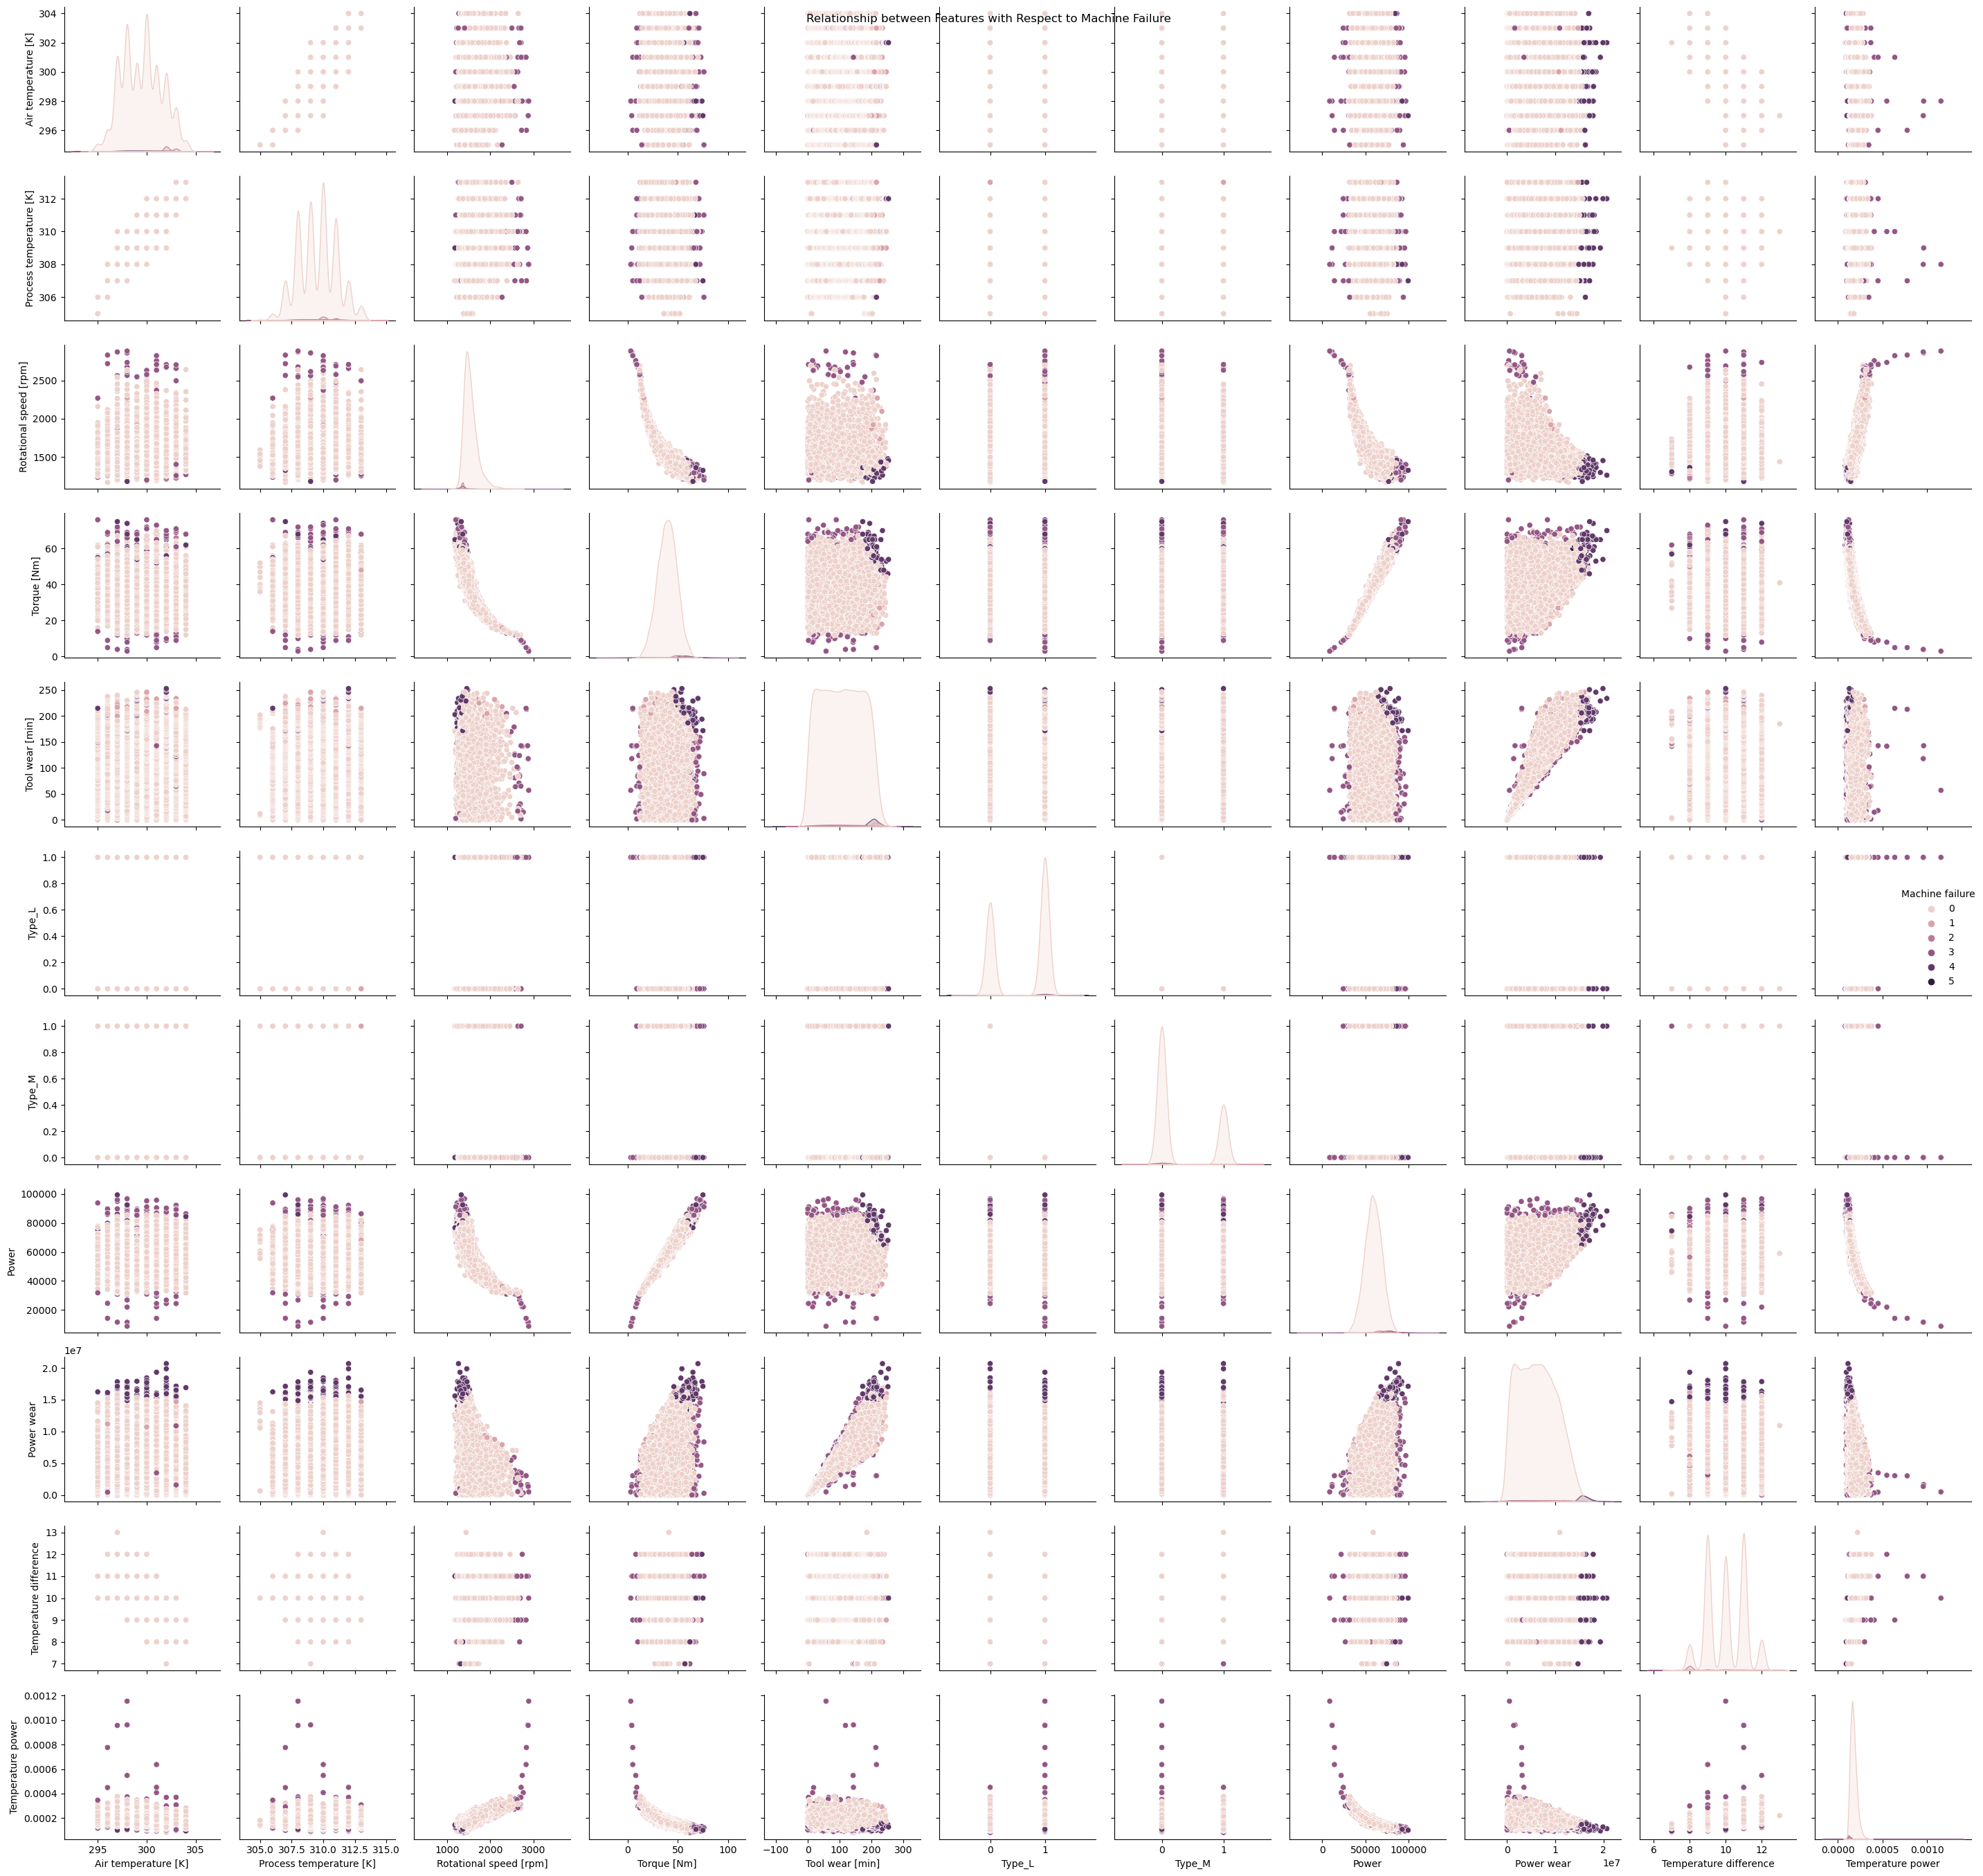

In [18]:
plt.figure(figsize=(100, 100))
sns.pairplot(df, hue='Machine failure')
plt.suptitle('Relationship between Features with Respect to Machine Failure')
plt.tight_layout()
plt.show()

### Correlation Heat Map

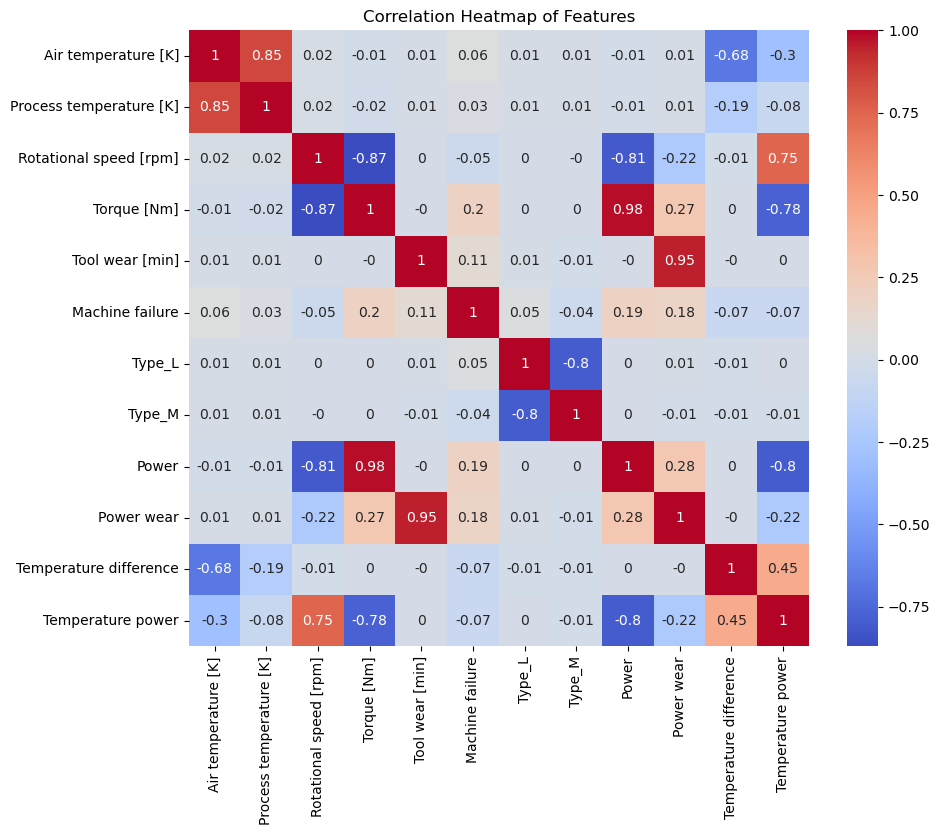

In [19]:
# Calculating the correlation matrix
corr_matrix = df.corr().round(2)

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

### Feature Distribution Comparison Based on Machine Failure: Box Plot Analysis

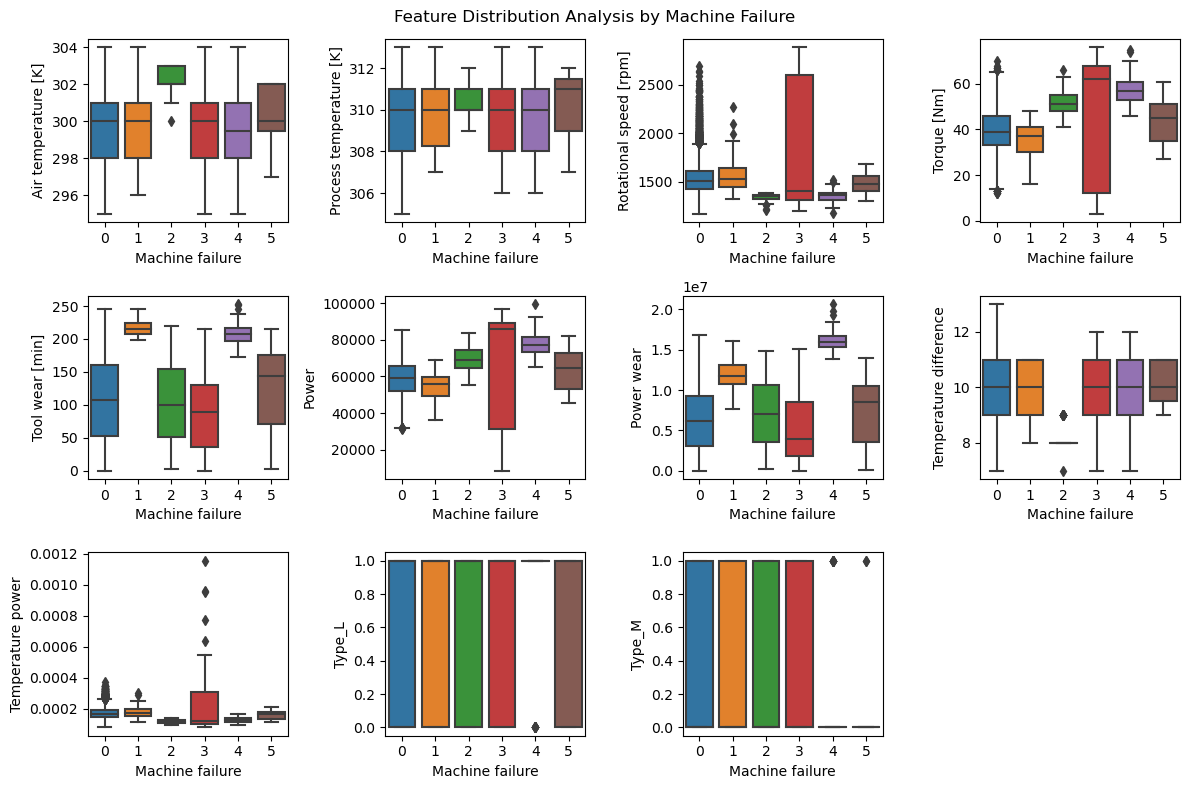

In [20]:
features = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]", "Power", "Power wear", "Temperature difference", "Temperature power", "Type_L", "Type_M"]

# Creating a grid of boxplots to visualize the distribution of features grouped by the "Machine Failure" variable
plt.figure(figsize=(12, 8))
for feature in features:
    plt.subplot(3, 4, features.index(feature) + 1)
    sns.boxplot(x="Machine failure", y=feature, data=df)
    plt.tight_layout()
plt.suptitle("Feature Distribution Analysis by Machine Failure")
plt.tight_layout()
plt.show()

### Standardization

By standardizing the features, we ensure that they have a mean of 0 and a standard deviation of 1, making them suitable for algorithms that assume normally distributed data or require standardized features for optimal performance. This is crucial because features often have vastly different ranges of values, which can complicate the model's ability to identify relationships among them.

In [21]:
# Separating features and target variable
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Principal Component Analysis

Performing Principal Component Analysis to reduce dimensionality and preserve variance

In [22]:
# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Checking the number of components selected
print("Number of Principal Components:", pca.n_components_)

# Concatenating the principal components with the target variable
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['Machine failure'] = y.values

# Displaying the transformed DataFrame
df_pca.head()

Number of Principal Components: 11


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,Machine failure
0,-0.045081,-0.867732,-2.874335,1.316225,-0.715614,0.477852,-0.159532,-0.250245,-0.082784,0.097958,1.931756e-13,0
1,-0.599538,-1.026487,-2.234608,-1.600110,-0.591560,-0.114922,-0.140089,0.076312,-0.095263,-0.019982,-1.406090e-14,0
2,-1.147176,-1.046959,-2.281907,-1.614901,-0.628988,0.791857,-0.019235,-0.166959,-0.231907,0.136157,-8.314363e-17,0
3,0.504983,-0.912037,-1.934904,-1.526028,-0.634421,-0.611348,-0.205590,0.152299,0.073485,-0.031567,8.085108e-17,0
4,0.345209,-0.943990,-1.926700,-1.523865,-0.613109,-0.679327,-0.215005,0.197437,0.061769,-0.047234,8.949763e-17,0


In [23]:
# Extracting the names of the original features
feature_names = X.columns

# Extrating the principal component axes
principal_axes = pca.components_

# Creating a DataFrame to display the feature names along with their importance in each principal component
feature_importance_df = pd.DataFrame(principal_axes.T, columns=[f'PC{i+1}' for i in range(principal_axes.shape[0])], index=feature_names)

# Displaying the DataFrame
print("Feature Importance in Principal Components:")
feature_importance_df

Feature Importance in Principal Components:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Air temperature [K],-0.084622,0.653047,0.039010,0.005762,0.104983,-0.004083,0.002931,0.111473,0.006626,0.027276,-7.352228e-01
Process temperature [K],-0.040077,0.527750,0.050714,0.008599,0.635123,-0.006224,0.004054,-0.094284,-0.003804,-0.020164,5.517981e-01
Rotational speed [rpm],0.466506,0.115626,0.108454,0.023456,-0.102704,0.806569,0.106273,-0.181962,-0.053621,-0.219794,4.712046e-18
Torque [Nm],-0.497220,-0.119309,-0.102117,-0.025590,0.119599,0.234656,0.022440,0.427359,-0.139875,-0.674821,1.260124e-16
Tool wear [min],-0.074653,-0.041806,0.697939,0.169321,-0.032546,-0.085899,-0.011149,-0.008695,-0.682439,0.050299,-6.107393e-17
Type_L,-0.000764,0.002296,0.165735,-0.687424,-0.002418,0.087054,-0.701593,-0.012512,-0.000350,-0.000193,1.221154e-18
Type_M,-0.001963,0.008796,-0.164507,0.687655,0.000352,0.092573,-0.700938,-0.009868,0.002028,0.000983,-3.934755e-17
Power,-0.491718,-0.113563,-0.096510,-0.026000,0.109046,0.515217,0.064765,0.082882,-0.067551,0.665102,-2.235401e-16
Power wear,-0.208959,-0.072438,0.643804,0.153286,-0.002118,0.072982,0.010469,0.007762,0.710458,-0.053459,1.278068e-16
Temperature difference,0.101870,-0.479919,-0.001771,0.001291,0.694190,-0.001098,0.000207,-0.340354,-0.017708,-0.079207,-3.936575e-01


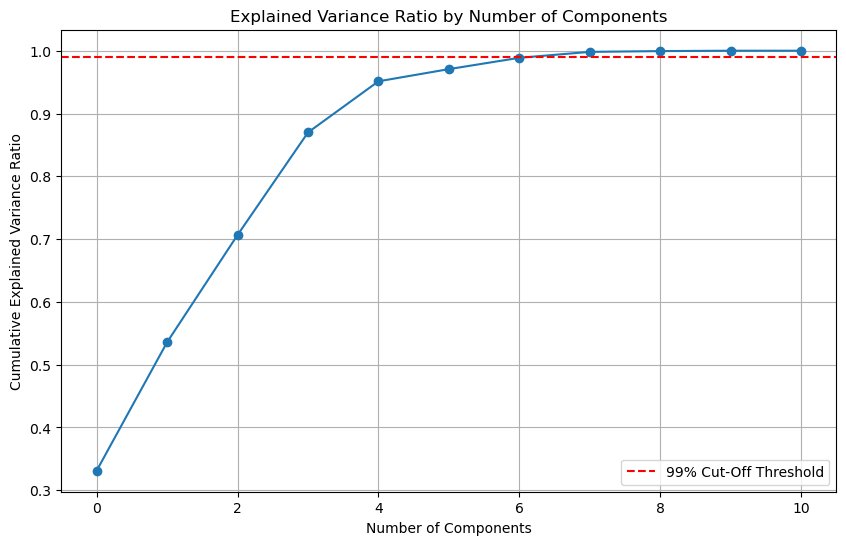

In [24]:
# Plotting explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.axhline(y=0.99, color='red', linestyle='--', label='99% Cut-Off Threshold')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.legend()
plt.show()

Based on our analysis of the cumulative explained variance ratio plot, we have determined that 99% of the variance in the data can be explained by retaining only the first 6 principal components. Consequently, as part of the dimensionality reduction process, we have opted to retain solely these 6 principal components. This decision enables us to capture the majority of the variance within the data while significantly reducing its dimensionality, which can offer computational benefits, enhance model performance, and facilitate clearer data interpretation.

In [25]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

### Feature Selection

We are implementing machine learning models using exclusively the features that have been engineered through our feature engineering process. These features, namely `Power`, `Power wear`, `Temperature difference`, and `Temperature power`, have been derived to capture relevant information from the dataset. Each of these features plays a critical role in understanding and predicting the various failure modes observed in the manufacturing process.

Specifically, the engineered features encapsulate distinct failure modes such as tool wear failure (`TWF`), heat dissipation failure (`HDF`), power failure (`PWF`), overstrain failure (`OSF`), and random failures (`RNF`). For instance, `TWF` occurs when the tool reaches a randomly selected wear time between 200 and 240 minutes, resulting in either replacement or failure. `HDF` occurs when the temperature difference between air and process falls below 8.6 K, coupled with a rotational speed below 1380 rpm. `PWF` manifests when the power required for the process, derived from the product of torque and rotational speed, falls outside the range of 3500 W to 9000 W. `OSF`, on the other hand, is triggered when the product of tool wear and torque exceeds specific thresholds for different product variants. Additionally, a small percentage of random failures (`RNF`) occur independent of process parameters.

In [26]:
selected_features = ['Power', 'Power wear', 'Temperature difference', 'Temperature power']
X_fs = df[selected_features]

### Data Splitting

The dataset will be split into train and test sets by `80:20` ratio

In [27]:
# Splitting the dataset into train and test sets (80% train, 20% test) for PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [28]:
# Splitting the dataset into train and test sets (80% train, 20% test) for LDA
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Splitting the dataset into train and test sets (80% train, 20% test) for Feature Selection
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y, test_size=0.2, random_state=42)

### Data Imbalance Handling

Performing oversampling only on the training data to avoid data leakage

In [30]:
ros = RandomOverSampler(random_state=42)

### Data Imbalance Handling for Principal Component Analysis (PCA)

In [31]:
# Applying RandomOverSampler to address data imbalance only on the training data of PCA
X_train_resampled_pca, y_train_resampled_pca = ros.fit_resample(X_train_pca, y_train_pca)

# Checking the shape of the resampled training data of PCA
print("Shape of X_train_resampled_pca:", X_train_resampled_pca.shape)
print("Shape of y_train_resampled_pca:", y_train_resampled_pca.shape)

Shape of X_train_resampled_pca: (46302, 6)
Shape of y_train_resampled_pca: (46302,)


### Data Imbalance Handling for Linear Discriminant Analysis (LDA)

In [32]:
# Applying RandomOverSampler to address data imbalance only on the training data of LDA
X_train_resampled_lda, y_train_resampled_lda = ros.fit_resample(X_train_lda, y_train_lda)

# Checking the shape of the resampled training data of LDA
print("Shape of X_train_resampled_lda:", X_train_resampled_lda.shape)
print("Shape of y_train_resampled_lda:", y_train_resampled_lda.shape)

Shape of X_train_resampled_lda: (46302, 11)
Shape of y_train_resampled_lda: (46302,)


### Data Imbalance Handling for Feature Selection

In [33]:
# Applying RandomOverSampler to address data imbalance only on the training data of LDA
ros = RandomOverSampler(random_state=42)
X_train_resampled_fs, y_train_resampled_fs = ros.fit_resample(X_train_fs, y_train_fs)

# Checking the shape of the resampled training data of LDA
print("Shape of X_train_resampled_fs:", X_train_resampled_fs.shape)
print("Shape of y_train_resampled_fs:", y_train_resampled_fs.shape)

Shape of X_train_resampled_fs: (46302, 4)
Shape of y_train_resampled_fs: (46302,)


### Linear Discriminant Analysis

In [34]:
# Applying Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()

X_train_resampled_lda = lda.fit_transform(X_train_resampled_lda, y_train_resampled_lda)
X_test_lda = lda.transform(X_test_lda)

### Logistic Regression

In [35]:
# Logistic Regression model with GridSearchCV for hyperparameter tuning with PCA
logistic_regression = LogisticRegression(max_iter=1000)
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(estimator=logistic_regression, param_grid=param_grid_lr, cv=5, scoring='f1_weighted')

### Logistic Regression with Principal Component Analysis (PCA)

In [36]:
# Fitting GridSearchCV to the training data
grid_search_lr.fit(X_train_resampled_pca, y_train_resampled_pca)

# Extracting the best parameters
best_params_pca = grid_search_lr.best_params_

# Training Logistic Regression with best parameters
logistic_regression_best_pca = LogisticRegression(max_iter=1000, C=best_params_pca['C'])
logistic_regression_best_pca.fit(X_train_resampled_pca, y_train_resampled_pca)

# Evaluation on test set
y_pred_lr_pca = logistic_regression_best_pca.predict(X_test_pca)
print("Logistic Regression with Principal Component Analysis (PCA) Classification Report:")
print(classification_report(y_test_pca, y_pred_lr_pca))

Logistic Regression with Principal Component Analysis (PCA) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73      1935
           1       0.06      0.90      0.11        10
           2       0.11      0.80      0.20        15
           3       0.21      0.88      0.33        16
           4       0.62      1.00      0.77        18
           5       0.00      0.17      0.00         6

    accuracy                           0.58      2000
   macro avg       0.33      0.72      0.36      2000
weighted avg       0.97      0.58      0.72      2000



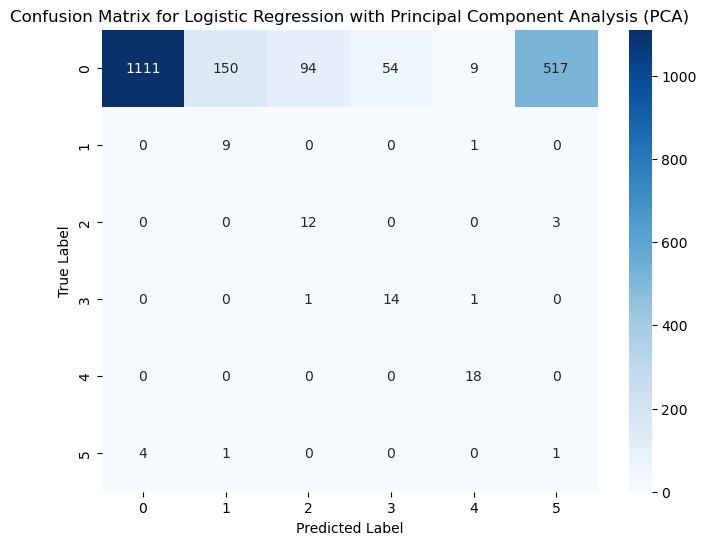

In [37]:
# Generating the Confusion Matrix for the test set
cm_lr_pca = confusion_matrix(y_test_pca, y_pred_lr_pca)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_pca, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_pca), 
            yticklabels=np.unique(y_test_pca))
plt.title(f'Confusion Matrix for Logistic Regression with Principal Component Analysis (PCA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Logistic Regression with Linear Discriminant Analysis (LDA)

In [38]:
# Fitting GridSearchCV to the training data
grid_search_lr.fit(X_train_resampled_lda, y_train_resampled_lda)

# Extracting the best parameters
best_params_lda = grid_search_lr.best_params_

# Training Logistic Regression with best parameters
logistic_regression_best_lda = LogisticRegression(max_iter=1000, C=best_params_lda['C'])
logistic_regression_best_lda.fit(X_train_resampled_lda, y_train_resampled_lda)

# Evaluation on test set
y_pred_lr_lda = logistic_regression_best_lda.predict(X_test_lda)
print("Logistic Regression with Linear Discriminant Analysis (LDA) Classification Report:")
print(classification_report(y_test_lda, y_pred_lr_lda))

Logistic Regression with Linear Discriminant Analysis (LDA) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79      1935
           1       0.06      1.00      0.11        10
           2       0.13      0.87      0.23        15
           3       0.36      1.00      0.53        16
           4       0.42      0.89      0.57        18
           5       0.00      0.17      0.01         6

    accuracy                           0.66      2000
   macro avg       0.33      0.76      0.37      2000
weighted avg       0.97      0.66      0.77      2000



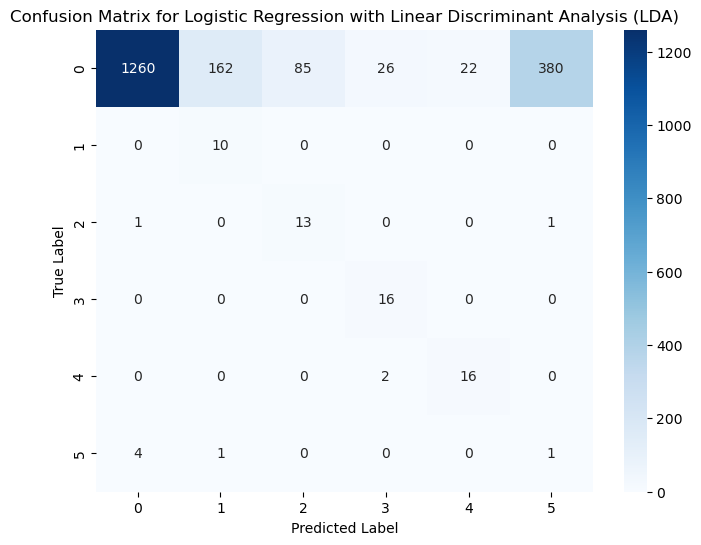

In [39]:
# Generating the Confusion Matrix for the test set
cm_lr_lda = confusion_matrix(y_test_lda, y_pred_lr_lda)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_lda, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_lda), 
            yticklabels=np.unique(y_test_lda))
plt.title(f'Confusion Matrix for Logistic Regression with Linear Discriminant Analysis (LDA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Logistic Regression with Feature Selection

In [40]:
# Fitting GridSearchCV to the training data
grid_search_lr.fit(X_train_resampled_fs, y_train_resampled_fs)

# Extracting the best parameters
best_params_fs = grid_search_lr.best_params_

# Training Logistic Regression with best parameters
logistic_regression_best_fs = LogisticRegression(max_iter=1000, C=best_params_fs['C'])
logistic_regression_best_fs.fit(X_train_resampled_fs, y_train_resampled_fs)

# Evaluation on test set
y_pred_lr_fs = logistic_regression_best_fs.predict(X_test_fs)
print("Logistic Regression with Feature Selection Classification Report:")
print(classification_report(y_test_fs, y_pred_lr_fs))

C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Logistic Regression with Feature Selection Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.51      0.67      1935
           1       0.05      0.70      0.09        10
           2       0.09      0.53      0.16        15
           3       0.00      0.12      0.01        16
           4       0.13      0.72      0.22        18
           5       0.00      0.00      0.00         6

    accuracy                           0.51      2000
   macro avg       0.21      0.43      0.19      2000
weighted avg       0.96      0.51      0.65      2000



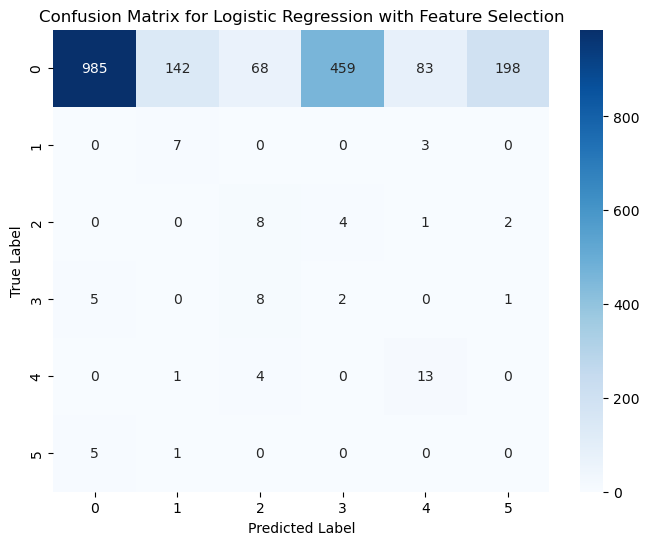

In [41]:
# Generating the Confusion Matrix for the test set
cm_lr_fs = confusion_matrix(y_test_fs, y_pred_lr_fs)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_fs, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_fs), 
            yticklabels=np.unique(y_test_fs))
plt.title(f'Confusion Matrix for Logistic Regression with Feature Selection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random Forest

In [42]:
# Random Forest Classifier model with GridSearchCV for hyperparameter tuning
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='f1_weighted')

### Random Forest with Prinicipal Component Analysis (PCA)

In [43]:
# Fitting GridSearchCV to the training data
grid_search_rf.fit(X_train_resampled_pca, y_train_resampled_pca)

# Extracting the best parameters and the best estimator
best_params_rf_pca = grid_search_rf.best_params_
best_estimator_rf_pca = grid_search_rf.best_estimator_

# Evaluation on test set
y_pred_rf_pca = best_estimator_rf_pca.predict(X_test_pca)
print("Random Forest with Principal Component Analysis (PCA) Classification Report:")
print(classification_report(y_test_pca, y_pred_rf_pca))

Random Forest with Principal Component Analysis (PCA) Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1935
           1       0.00      0.00      0.00        10
           2       0.50      0.20      0.29        15
           3       0.67      0.62      0.65        16
           4       0.86      0.67      0.75        18
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.50      0.41      0.44      2000
weighted avg       0.97      0.97      0.97      2000



C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


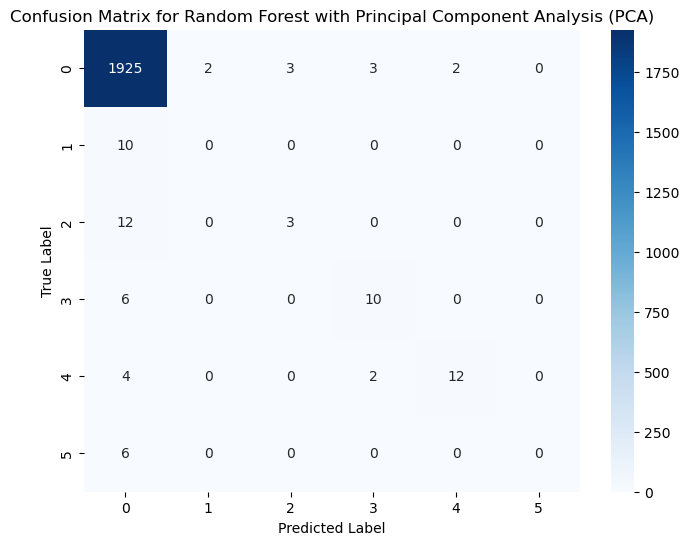

In [44]:
# Generating the Confusion Matrix for the test set
cm_rf_pca = confusion_matrix(y_test_pca, y_pred_rf_pca)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_pca, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_pca), 
            yticklabels=np.unique(y_test_pca))
plt.title(f'Confusion Matrix for Random Forest with Principal Component Analysis (PCA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random Forest with Linear Discriminant Analysis (LDA)

In [45]:
# Fitting GridSearchCV to the training data
grid_search_rf.fit(X_train_resampled_lda, y_train_resampled_lda)

# Extracting the best parameters and the best estimator
best_params_rf_lda = grid_search_rf.best_params_
best_estimator_rf_lda = grid_search_rf.best_estimator_

# Evaluation on test set
y_pred_rf_lda = best_estimator_rf_lda.predict(X_test_lda)
print("Random Forest with Linear Discriminant Analysis (LDA) Classification Report:")
print(classification_report(y_test_lda, y_pred_rf_lda))

Random Forest with Linear Discriminant Analysis (LDA) Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1935
           1       0.33      0.20      0.25        10
           2       0.42      0.33      0.37        15
           3       0.75      0.75      0.75        16
           4       0.70      0.78      0.74        18
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.53      0.51      0.52      2000
weighted avg       0.97      0.97      0.97      2000



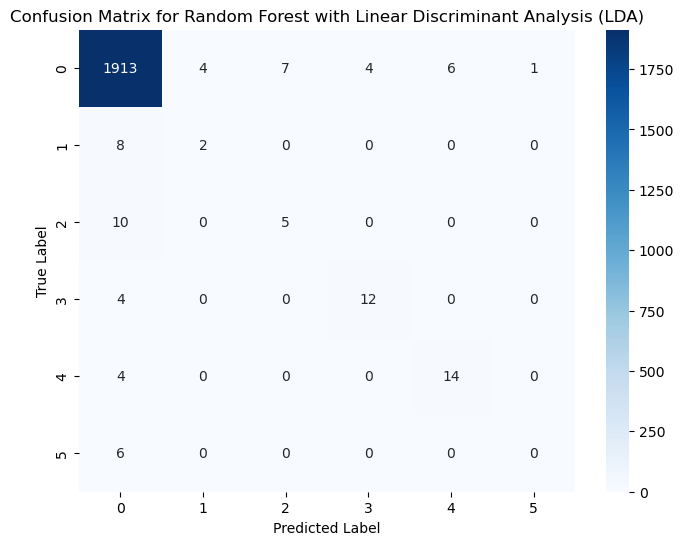

In [46]:
# Generating the Confusion Matrix for the test set
cm_rf_lda = confusion_matrix(y_test_lda, y_pred_rf_lda)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_lda, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_lda), 
            yticklabels=np.unique(y_test_lda))
plt.title(f'Confusion Matrix for Random Forest with Linear Discriminant Analysis (LDA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random Forest with Feature Selection

In [47]:
# Fitting GridSearchCV to the training data
grid_search_rf.fit(X_train_resampled_fs, y_train_resampled_fs)

# Extracting the best parameters and the best estimator
best_params_rf_fs = grid_search_rf.best_params_
best_estimator_rf_fs = grid_search_rf.best_estimator_

# Evaluation on test set
y_pred_rf_fs = best_estimator_rf_fs.predict(X_test_fs)
print("Random Forest with Feature Selection Classification Report:")
print(classification_report(y_test_fs, y_pred_rf_fs))

Random Forest with Feature Selection Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1935
           1       0.00      0.00      0.00        10
           2       0.23      0.33      0.27        15
           3       0.94      0.94      0.94        16
           4       0.72      0.72      0.72        18
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.97      0.97      0.97      2000



C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


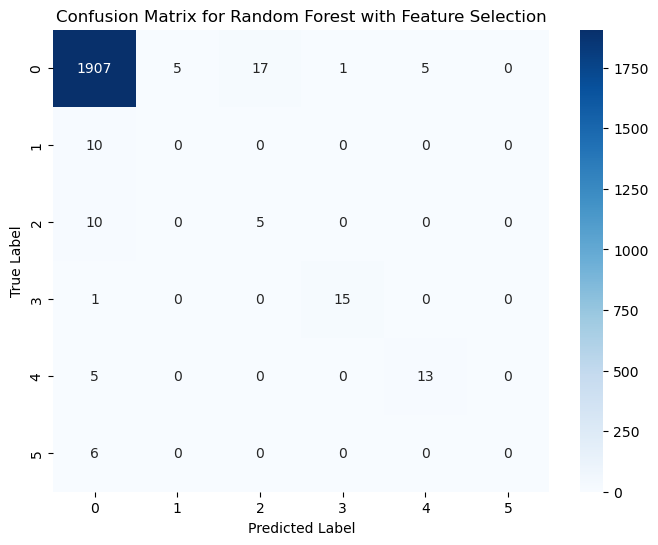

In [48]:
# Generating the Confusion Matrix for the test set
cm_rf_fs = confusion_matrix(y_test_fs, y_pred_rf_fs)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_fs, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_fs), 
            yticklabels=np.unique(y_test_fs))
plt.title(f'Confusion Matrix for Random Forest with Feature Selection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Decision Tree

In [49]:
# Decision Tree Classifier model with GridSearchCV for hyperparameter tuning
dt_classifier = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='f1_weighted')

### Decision Tree with Prinicipal Component Analysis (PCA)

In [50]:
# Fitting GridSearchCV to the training data
grid_search_dt.fit(X_train_resampled_pca, y_train_resampled_pca)

# Extract the best parameters and the best estimator
best_params_dt_pca = grid_search_dt.best_params_
best_estimator_dt_pca = grid_search_dt.best_estimator_

# Evaluation on test set
y_pred_dt_pca = best_estimator_dt_pca.predict(X_test_pca)
print("Decision Tree with Principal Component Analysis (PCA) Classification Report:")
print(classification_report(y_test_pca, y_pred_dt_pca))

Decision Tree with Principal Component Analysis (PCA) Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1935
           1       0.31      0.40      0.35        10
           2       0.29      0.27      0.28        15
           3       0.58      0.69      0.63        16
           4       0.75      0.50      0.60        18
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.48      0.47      0.47      2000
weighted avg       0.96      0.97      0.97      2000



C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


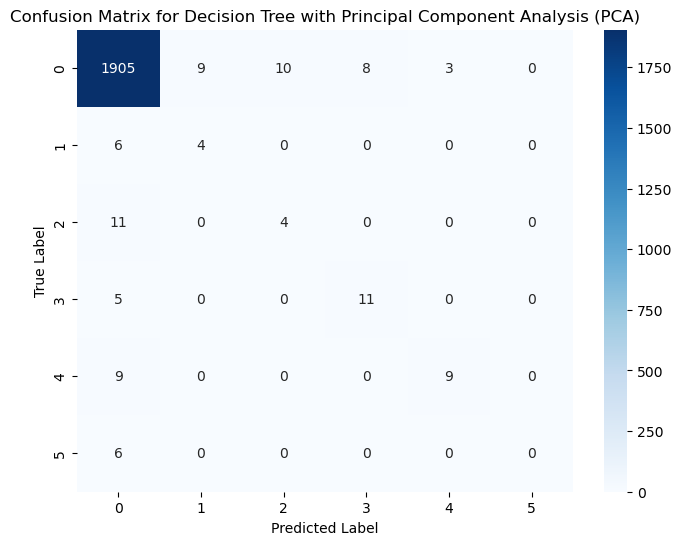

In [51]:
# Generating the Confusion Matrix for the test set
cm_dt_pca = confusion_matrix(y_test_pca, y_pred_dt_pca)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_pca, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_pca), 
            yticklabels=np.unique(y_test_pca))
plt.title(f'Confusion Matrix for Decision Tree with Principal Component Analysis (PCA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Decision Tree with Linear Discriminant Analysis (LDA)

In [52]:
# Fitting GridSearchCV to the training data
grid_search_dt.fit(X_train_resampled_lda, y_train_resampled_lda)

# Extract the best parameters and the best estimator
best_params_dt_lda = grid_search_dt.best_params_
best_estimator_dt_lda = grid_search_dt.best_estimator_

# Evaluation on test set
y_pred_dt_lda = best_estimator_dt_lda.predict(X_test_lda)
print("Decision Tree with Linear Discriminant Analysis (LDA) Classification Report:")
print(classification_report(y_test_lda, y_pred_dt_lda))

Decision Tree with Linear Discriminant Analysis (LDA) Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1935
           1       0.25      0.40      0.31        10
           2       0.29      0.27      0.28        15
           3       0.77      0.62      0.69        16
           4       0.75      0.67      0.71        18
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.51      0.49      0.49      2000
weighted avg       0.97      0.97      0.97      2000



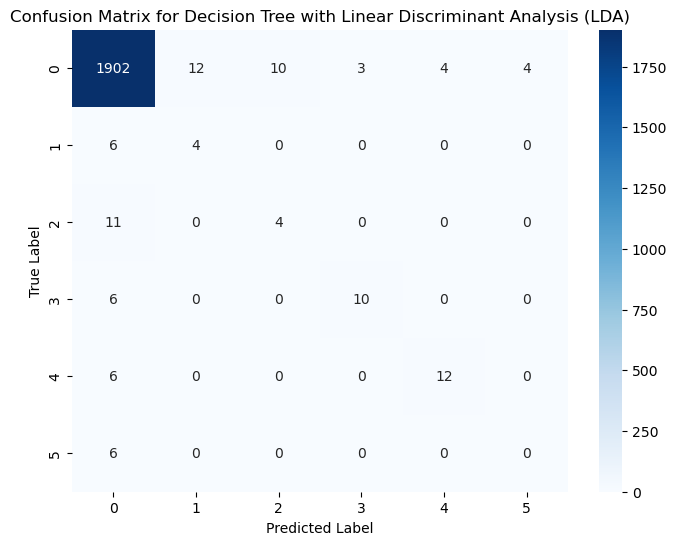

In [53]:
# Generating the Confusion Matrix for the test set
cm_dt_lda = confusion_matrix(y_test_lda, y_pred_dt_lda)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_lda, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_lda), 
            yticklabels=np.unique(y_test_lda))
plt.title(f'Confusion Matrix for Decision Tree with Linear Discriminant Analysis (LDA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Decision Tree with Feature Selection

In [55]:
# Fitting GridSearchCV to the training data
grid_search_dt.fit(X_train_resampled_fs, y_train_resampled_fs)

# Extract the best parameters and the best estimator
best_params_dt_fs = grid_search_dt.best_params_
best_estimator_dt_fs = grid_search_dt.best_estimator_

# Evaluation on test set
y_pred_dt_fs = best_estimator_dt_fs.predict(X_test_fs)
print("Decision Tree with Feature Selection Classification Report:")
print(classification_report(y_test_fs, y_pred_dt_fs))

Decision Tree with Feature Selection Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1935
           1       0.00      0.00      0.00        10
           2       0.15      0.20      0.17        15
           3       0.87      0.81      0.84        16
           4       0.57      0.44      0.50        18
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.43      0.41      0.42      2000
weighted avg       0.96      0.97      0.96      2000



C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


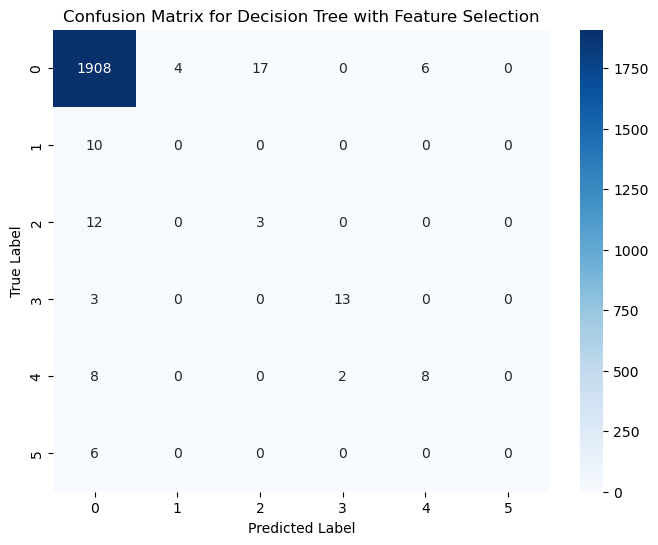

In [56]:
# Generating the Confusion Matrix for the test set
cm_dt_fs = confusion_matrix(y_test_fs, y_pred_dt_fs)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_fs, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_fs), 
            yticklabels=np.unique(y_test_fs))
plt.title(f'Confusion Matrix for Decision Tree with Feature Selection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### XGBoost

In [57]:
xgb_classifier = XGBClassifier(random_state=42)
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=5, scoring='f1_weighted')

### XGBoost with Prinicipal Component Analysis (PCA)

In [58]:
# Fitting GridSearchCV to the training data
grid_search_xgb.fit(X_train_resampled_pca, y_train_resampled_pca)

# Extracting the best parameters and the best estimator
best_params_xgb_pca = grid_search_xgb.best_params_
best_estimator_xgb_pca = grid_search_xgb.best_estimator_

# Evaluation on test set
y_pred_xgb_pca = best_estimator_xgb_pca.predict(X_test_pca)
print("XGBoost with Prinicipal Component Analysis (PCA) Classification Report:")
print(classification_report(y_test_pca, y_pred_xgb_pca))

XGBoost with Prinicipal Component Analysis (PCA) Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1935
           1       0.00      0.00      0.00        10
           2       0.44      0.27      0.33        15
           3       0.65      0.81      0.72        16
           4       0.79      0.83      0.81        18
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.97      0.97      0.97      2000



C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


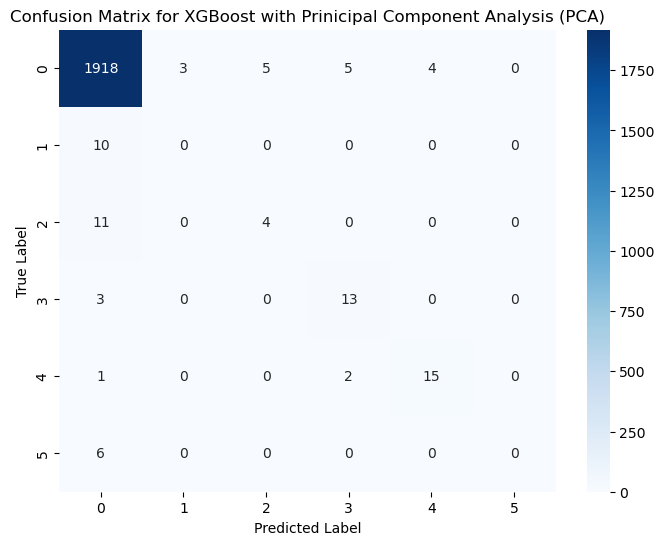

In [59]:
# Generating the Confusion Matrix for the test set
cm_xgb_pca = confusion_matrix(y_test_pca, y_pred_xgb_pca)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_pca, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_pca), 
            yticklabels=np.unique(y_test_pca))
plt.title(f'Confusion Matrix for XGBoost with Prinicipal Component Analysis (PCA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### XGBoost with Linear Discriminant Analysis (LDA)

In [61]:
# Fitting GridSearchCV to the training data
grid_search_xgb.fit(X_train_resampled_lda, y_train_resampled_lda)

# Extracting the best parameters and the best estimator
best_params_xgb_lda = grid_search_xgb.best_params_
best_estimator_xgb_lda = grid_search_xgb.best_estimator_

# Evaluation on test set
y_pred_xgb_lda = best_estimator_xgb_lda.predict(X_test_lda)
print("XGBoost with Linear Discriminant Analysis (LDA) Classification Report:")
print(classification_report(y_test_lda, y_pred_xgb_lda))

XGBoost with Linear Discriminant Analysis (LDA) Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1935
           1       0.17      0.10      0.12        10
           2       0.31      0.33      0.32        15
           3       0.76      0.81      0.79        16
           4       0.83      0.83      0.83        18
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.97      0.97      0.97      2000



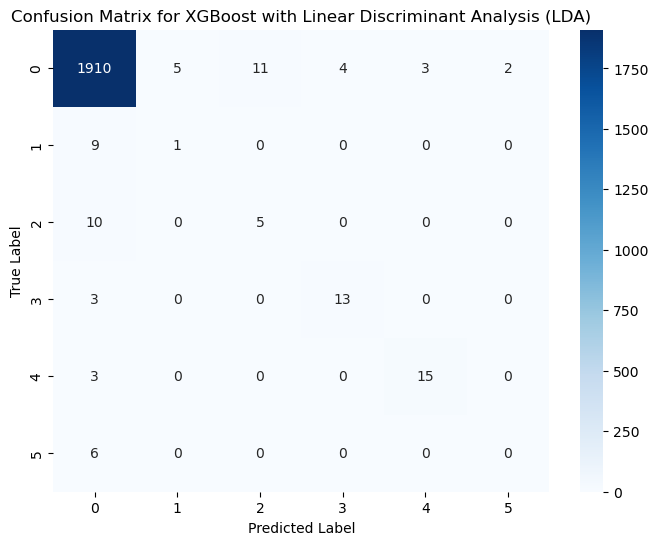

In [62]:
# Generating the Confusion Matrix for the test set
cm_xgb_lda = confusion_matrix(y_test_lda, y_pred_xgb_lda)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_lda, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_lda), 
            yticklabels=np.unique(y_test_lda))
plt.title(f'Confusion Matrix for XGBoost with Linear Discriminant Analysis (LDA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### XGBoost with Feature Selection

In [63]:
# Fitting GridSearchCV to the training data
grid_search_xgb.fit(X_train_resampled_fs, y_train_resampled_fs)

# Extracting the best parameters and the best estimator
best_params_xgb_fs = grid_search_xgb.best_params_
best_estimator_xgb_fs = grid_search_xgb.best_estimator_

# Evaluation on test set
y_pred_xgb_fs = best_estimator_xgb_fs.predict(X_test_fs)
print("XGBoost with Feature Selection Classification Report:")
print(classification_report(y_test_fs, y_pred_xgb_fs))

XGBoost with Feature Selection Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1935
           1       0.00      0.00      0.00        10
           2       0.12      0.20      0.15        15
           3       0.93      0.81      0.87        16
           4       0.65      0.61      0.63        18
           5       0.00      0.00      0.00         6

    accuracy                           0.96      2000
   macro avg       0.45      0.43      0.44      2000
weighted avg       0.96      0.96      0.96      2000



C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LaxmanRao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


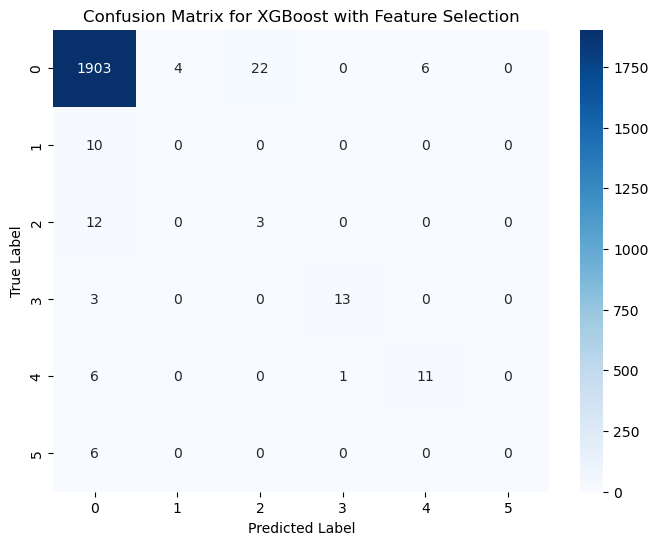

In [64]:
# Generating the Confusion Matrix for the test set
cm_xgb_fs = confusion_matrix(y_test_fs, y_pred_xgb_fs)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_fs, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_fs), 
            yticklabels=np.unique(y_test_fs))
plt.title(f'Confusion Matrix for XGBoost with Feature Selection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Model Evaluation and Comparison

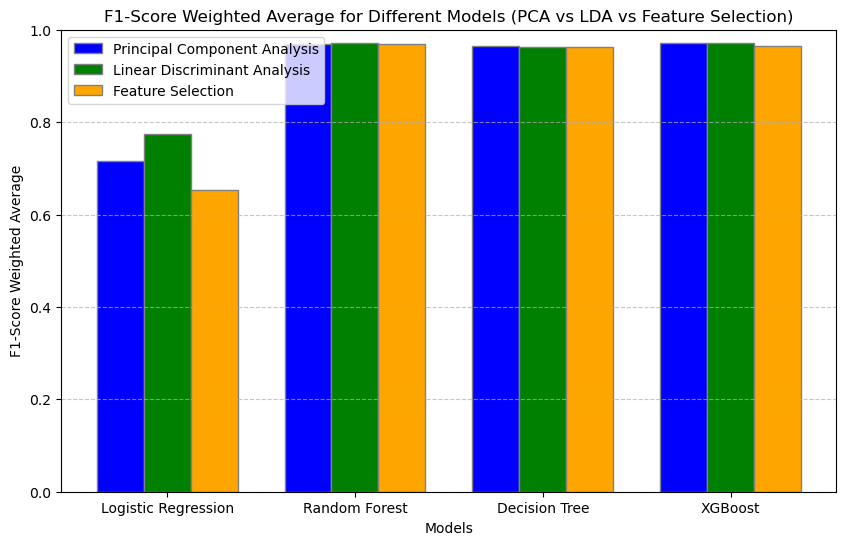

In [66]:
# F1-Score weighted average for each model
f1_scores_pca = {
    'Logistic Regression': f1_score(y_test_pca, y_pred_lr_pca, average='weighted'),
    'Random Forest': f1_score(y_test_pca, y_pred_rf_pca, average='weighted'),
    'Decision Tree': f1_score(y_test_pca, y_pred_dt_pca, average='weighted'),
    'XGBoost': f1_score(y_test_pca, y_pred_xgb_pca, average='weighted')
}

f1_scores_lda = {
    'Logistic Regression': f1_score(y_test_lda, y_pred_lr_lda, average='weighted'),
    'Random Forest': f1_score(y_test_lda, y_pred_rf_lda, average='weighted'),
    'Decision Tree': f1_score(y_test_lda, y_pred_dt_lda, average='weighted'),
    'XGBoost': f1_score(y_test_lda, y_pred_xgb_lda, average='weighted')
}

f1_scores_fs = {
    'Logistic Regression': f1_score(y_test_fs, y_pred_lr_fs, average='weighted'),
    'Random Forest': f1_score(y_test_fs, y_pred_rf_fs, average='weighted'),
    'Decision Tree': f1_score(y_test_fs, y_pred_dt_fs, average='weighted'),
    'XGBoost': f1_score(y_test_fs, y_pred_xgb_fs, average='weighted')
}

# Extracting model names and F1 scores for PCA and LDA
models = list(f1_scores_pca.keys())
f1_pca = list(f1_scores_pca.values())
f1_lda = list(f1_scores_lda.values())
f1_fs = list(f1_scores_fs.values())

# Setting the width of the bars
bar_width = 0.25

# Setting position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(r1, f1_pca, color='blue', width=bar_width, edgecolor='grey', label='Principal Component Analysis')
plt.bar(r2, f1_lda, color='green', width=bar_width, edgecolor='grey', label='Linear Discriminant Analysis')
plt.bar(r3, f1_fs, color='orange', width=bar_width, edgecolor='grey', label='Feature Selection')

# Adding labels
plt.xlabel('Models')
plt.ylabel('F1-Score Weighted Average')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylim(0, 1)
plt.title('F1-Score Weighted Average for Different Models (PCA vs LDA vs Feature Selection)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the plot
plt.show()